# CHRIS WHITE - BICYCLE CLOTHING ACCESSORIES DATA ANALYSIS OF GLOBAL MULTI-STORE BRAND

# Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats


# Import the Data

In [6]:
df = pd.read_csv('bike data.csv')

# Exploratory Data Analysis and Data  Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   year              113036 non-null  int64  
 2   Customer ID       113036 non-null  int64  
 3   Customer Age      113036 non-null  int64  
 4   Age Group         113036 non-null  object 
 5   Customer Gender   113036 non-null  object 
 6   Country           113036 non-null  object 
 7   State             113036 non-null  object 
 8   Product Category  113036 non-null  object 
 9   Sub Category      113036 non-null  object 
 10  Product           113036 non-null  object 
 11  Frame Size        25982 non-null   float64
 12  Order Quantity    113036 non-null  int64  
 13  Unit Cost         113036 non-null  int64  
 14  Unit Price        113036 non-null  int64  
 15  Cost              113036 non-null  int64  
 16  Revenue           11

In [9]:
df.describe()

,year,Customer ID,Customer Age,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
count,113036.000000,113036.000000,113036.000000,25982.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,19227.874341,35.919212,47.313063,11.901660,267.296366,452.938427,469.318695,754.370360,285.051665
std,1.272510,5307.581302,11.021936,6.860797,9.561857,549.835483,922.071219,884.866118,1309.094674,453.887443
min,2011.000000,11000.000000,17.000000,38.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-30.000000
25%,2013.000000,14611.000000,28.000000,42.000000,2.000000,2.000000,5.000000,28.000000,63.000000,29.000000
50%,2014.000000,18664.000000,35.000000,46.000000,10.000000,9.000000,24.000000,108.000000,223.000000,101.000000
75%,2016.000000,23475.000000,43.000000,52.000000,20.000000,42.000000,70.000000,432.000000,800.000000,358.000000
max,2016.000000,29483.000000,87.000000,62.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,15096.000000


In [10]:
# Finding out what columns there are in the data.
df.columns


Index(['Date', 'year', 'Customer ID', 'Customer Age', 'Age Group',
       'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product', 'Frame Size', 'Order Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')

In [11]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


In [12]:
# Noticed the date column was set as an object so changed it to the pandas date time format.
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.normalize()

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   year              113036 non-null  int64         
 2   Customer ID       113036 non-null  int64         
 3   Customer Age      113036 non-null  int64         
 4   Age Group         113036 non-null  object        
 5   Customer Gender   113036 non-null  object        
 6   Country           113036 non-null  object        
 7   State             113036 non-null  object        
 8   Product Category  113036 non-null  object        
 9   Sub Category      113036 non-null  object        
 10  Product           113036 non-null  object        
 11  Frame Size        25982 non-null   float64       
 12  Order Quantity    113036 non-null  int64         
 13  Unit Cost         113036 non-null  int64         
 14  Unit

In [13]:
df.sample(10)

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Year,Month
85216,2016-03-29,2016,15883,52,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,LL Mountain Tire,NaN,16,9,25,144,392,248,2016,3
34856,2014-07-22,2014,17342,19,Youth (<25),M,United States,Washington,Accessories,Helmets,"Sport-100 Helmet, Red",NaN,14,13,35,182,382,200,2014,7
9761,2013-12-06,2013,20217,30,Young Adults (25-34),F,Australia,Queensland,Accessories,Bottles and Cages,Water Bottle - 30 oz.,NaN,24,2,5,48,101,53,2013,12
45320,2013-11-30,2013,15876,53,Adults (35-64),M,Canada,British Columbia,Clothing,Jerseys,"Short-Sleeve Classic Jersey, XL",NaN,10,42,54,420,535,115,2013,11
75855,2014-01-27,2014,11619,24,Youth (<25),F,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,NaN,30,1,2,30,59,29,2014,1
11709,2014-01-11,2014,21814,45,Adults (35-64),M,United States,Oregon,Accessories,Bottles and Cages,Water Bottle - 30 oz.,NaN,23,2,5,46,99,53,2014,1
30251,2016-05-10,2016,11510,44,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",NaN,30,13,35,390,1040,650,2016,5
44059,2016-04-08,2016,12386,25,Young Adults (25-34),F,Germany,Bayern,Clothing,Jerseys,"Short-Sleeve Classic Jersey, L",NaN,17,42,54,714,909,195,2016,4
98174,2014-07-31,2014,23451,40,Adults (35-64),F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,NaN,7,1,2,7,11,4,2014,7
86916,2013-09-25,2013,16600,49,Adults (35-64),F,France,Hauts de Seine,Accessories,Tires and Tubes,Touring Tire Tube,NaN,13,2,5,26,60,34,2013,9


In [14]:
#  These are the columns I decided to drop
cols_to_drp =['year','Customer ID', 'Unit Cost', 'Unit Price', 'State','Frame Size', 'Product']
cols_to_drp

['year',
 'Customer ID',
 'Unit Cost',
 'Unit Price',
 'State',
 'Frame Size',
 'Product']

In [15]:
#  Making a copy of the df and dropping the columns and printing the top 10 rows
bike_data = df.copy()
 
bike_data = df.drop(columns = cols_to_drp)

bike_data.head(10)



,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
0,2013-11-26,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,360,950,590,2013,11
1,2015-11-26,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,360,950,590,2015,11
2,2014-03-23,49,Adults (35-64),M,Australia,Accessories,Bike Racks,23,1035,2401,1366,2014,3
3,2016-03-23,49,Adults (35-64),M,Australia,Accessories,Bike Racks,20,900,2088,1188,2016,3
4,2014-05-15,47,Adults (35-64),F,Australia,Accessories,Bike Racks,4,180,418,238,2014,5
5,2016-05-15,47,Adults (35-64),F,Australia,Accessories,Bike Racks,5,225,522,297,2016,5
6,2014-05-22,47,Adults (35-64),F,Australia,Accessories,Bike Racks,4,180,379,199,2014,5
7,2016-05-22,47,Adults (35-64),F,Australia,Accessories,Bike Racks,2,90,190,100,2016,5
8,2014-02-22,35,Adults (35-64),M,Australia,Accessories,Bike Racks,22,990,2086,1096,2014,2
9,2016-02-22,35,Adults (35-64),M,Australia,Accessories,Bike Racks,21,945,1991,1046,2016,2


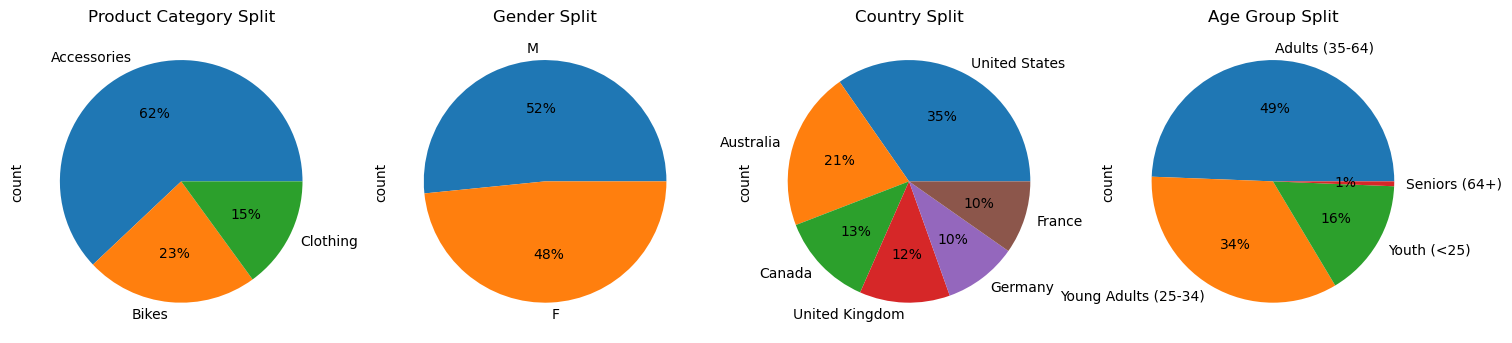

In [16]:
# Put together 4 pie charts in a row showing some of the high level data.
fig, axes = plt.subplots(1, 4, figsize=(18, 6))


bike_data['Product Category'].value_counts().plot.pie(autopct='%1.0f%%', title = "Product Category Split", ax=axes[0])
bike_data['Customer Gender'].value_counts().plot.pie(autopct='%1.0f%%', title = "Gender Split", ax=axes[1])
bike_data['Country'].value_counts().plot.pie(autopct='%1.0f%%', title = "Country Split", ax=axes[2])
bike_data['Age Group'].value_counts().plot.pie(autopct='%1.0f%%', title = "Age Group Split", ax=axes[3])
plt.show()

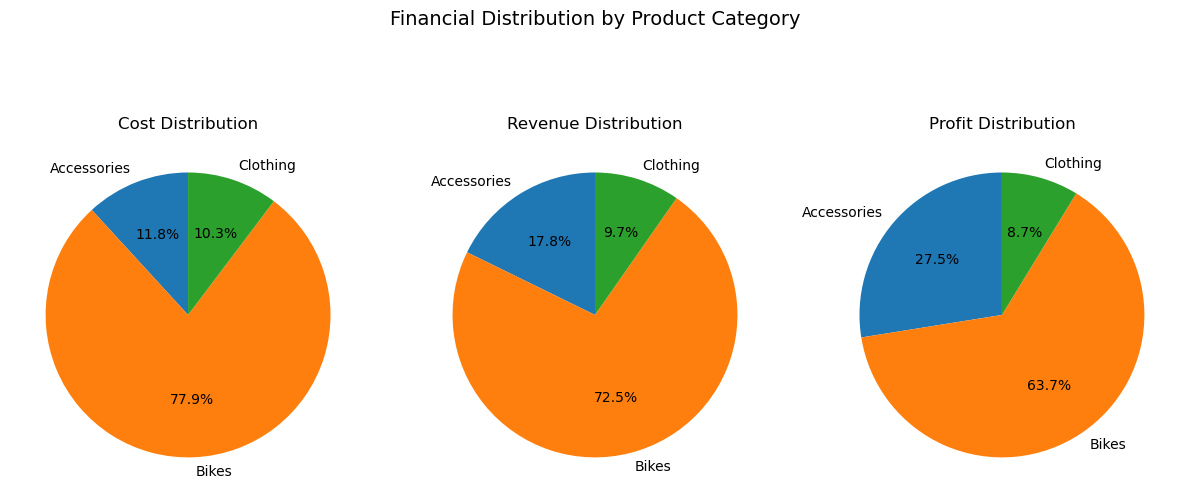

In [83]:
# I put together 3 financial pie charts showing the high level splits.
grp_fncl = bike_data.groupby('Product Category').agg({'Profit': 'sum', 'Revenue': 'sum', 'Cost': 'sum'}).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

ax3.pie(grp_fncl['Profit'], labels=grp_fncl['Product Category'], autopct='%1.1f%%', startangle=90)
ax3.set_title('Profit Distribution')

ax2.pie(grp_fncl['Revenue'], labels=grp_fncl['Product Category'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue Distribution')

ax1.pie(grp_fncl['Cost'], labels=grp_fncl['Product Category'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Cost Distribution')

fig.suptitle('Financial Distribution by Product Category', fontsize=14)

plt.tight_layout()
plt.show()


In [18]:
bike_data.describe()

,Date,Customer Age,Order Quantity,Cost,Revenue,Profit,Year,Month
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,35.919212,11.901660,469.318695,754.370360,285.051665,2014.401739,6.453024
min,2011-01-01 00:00:00,17.000000,1.000000,1.000000,2.000000,-30.000000,2011.000000,1.000000
25%,2013-12-22 00:00:00,28.000000,2.000000,28.000000,63.000000,29.000000,2013.000000,4.000000
50%,2014-06-27 00:00:00,35.000000,10.000000,108.000000,223.000000,101.000000,2014.000000,6.000000
75%,2016-01-09 00:00:00,43.000000,20.000000,432.000000,800.000000,358.000000,2016.000000,10.000000
max,2016-07-31 00:00:00,87.000000,32.000000,42978.000000,58074.000000,15096.000000,2016.000000,12.000000
std,NaN,11.021936,9.561857,884.866118,1309.094674,453.887443,1.272510,3.478198


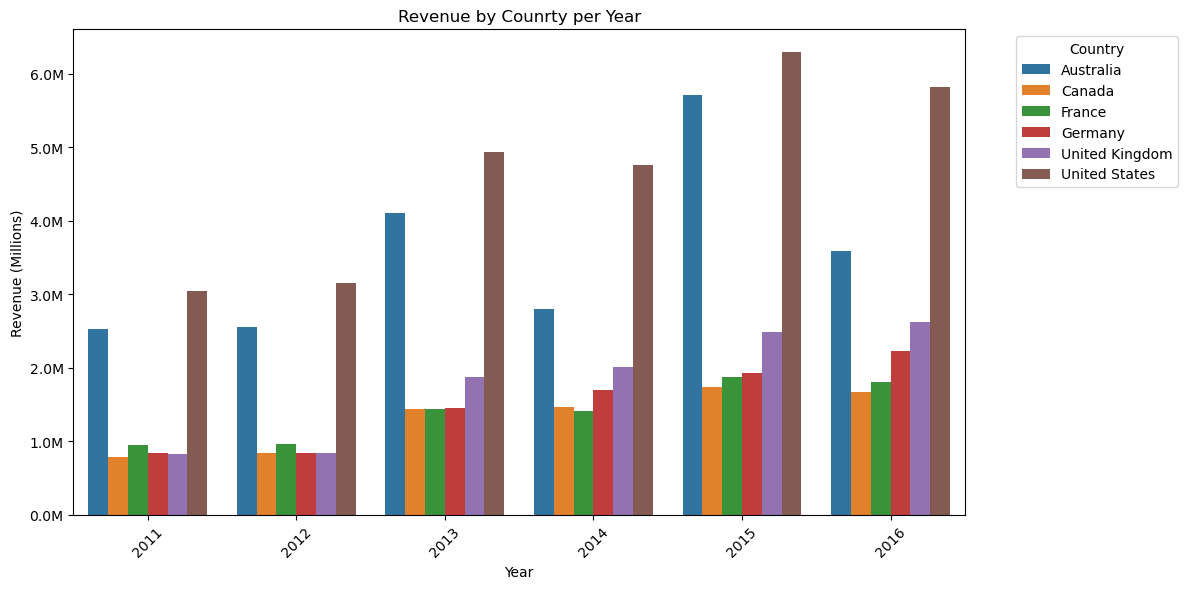

In [19]:
#  Grouped the Year, Country and Revenue data ran a Seaborn bar plot, needed a little function to change the y axis to millions.
grp_data = bike_data.groupby(['Year', 'Country'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue', hue='Country', data = grp_data)

def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Revenue by Counrty per Year')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')

plt.xticks(rotation=45)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


In [20]:
grp_data.head(8)

,Year,Country,Revenue
0,2011,Australia,2529914
1,2011,Canada,789798
2,2011,France,946624
3,2011,Germany,833603
4,2011,United Kingdom,823481
5,2011,United States,3041468
6,2012,Australia,2557511
7,2012,Canada,835527


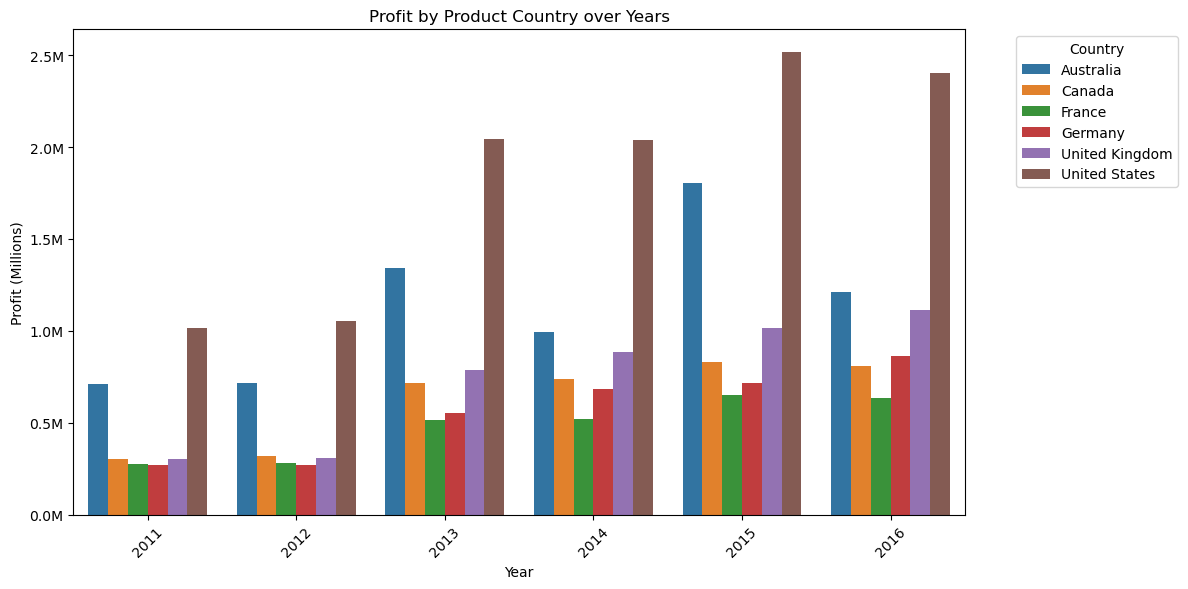

In [21]:
#  Copied above chart and changed the relevant columns and names.
grp_data_p = bike_data.groupby(['Year', 'Country'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Profit', hue='Country', data = grp_data_p)

def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Profit by Product Country over Years')
plt.xlabel('Year')
plt.ylabel('Profit (Millions)')

plt.xticks(rotation=45)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


In [22]:
grp_data_p.head(8)

,Year,Country,Profit
0,2011,Australia,710466
1,2011,Canada,303494
2,2011,France,277373
3,2011,Germany,270488
4,2011,United Kingdom,303817
5,2011,United States,1015663
6,2012,Australia,716091
7,2012,Canada,319965


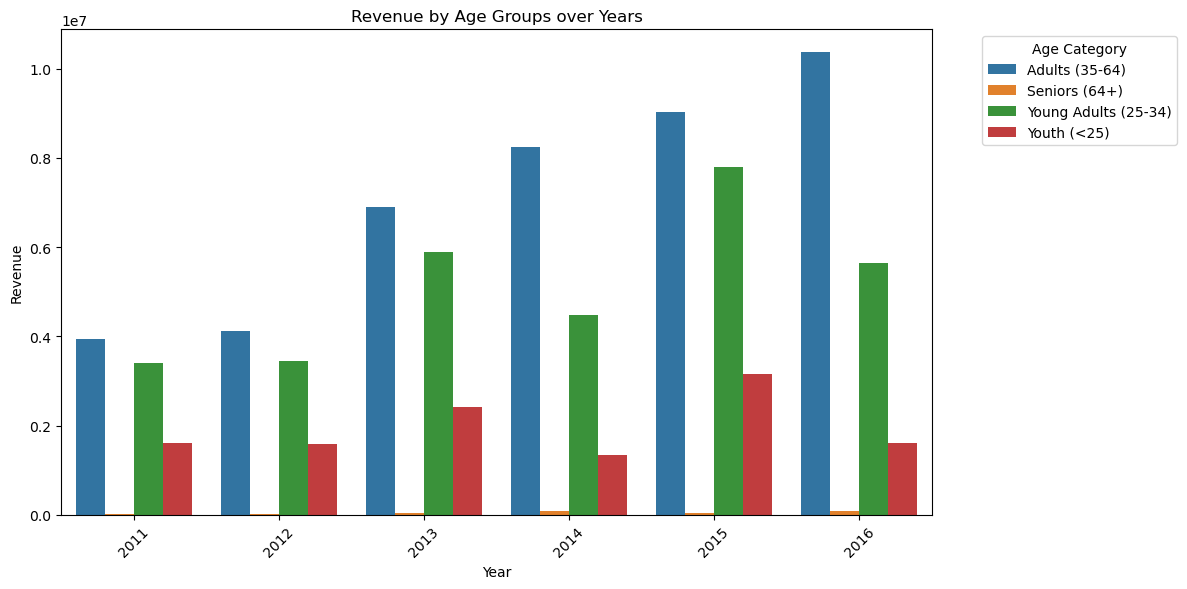

In [23]:
# Pulled together anther bar plot to show Revenue by Age category for EDA.
grp_data_a = bike_data.groupby(['Year', 'Age Group'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue', hue='Age Group', data = grp_data_a)


plt.title('Revenue by Age Groups over Years')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.xticks(rotation=45)

plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


In [24]:
#  Used data above to see what it looked like.
grp_data_a.head(8)

,Year,Age Group,Revenue
0,2011,Adults (35-64),3932489
1,2011,Seniors (64+),25363
2,2011,Young Adults (25-34),3399983
3,2011,Youth (<25),1607053
4,2012,Adults (35-64),4110904
5,2012,Seniors (64+),23230
6,2012,Young Adults (25-34),3454784
7,2012,Youth (<25),1587065


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_4431/3391200560.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


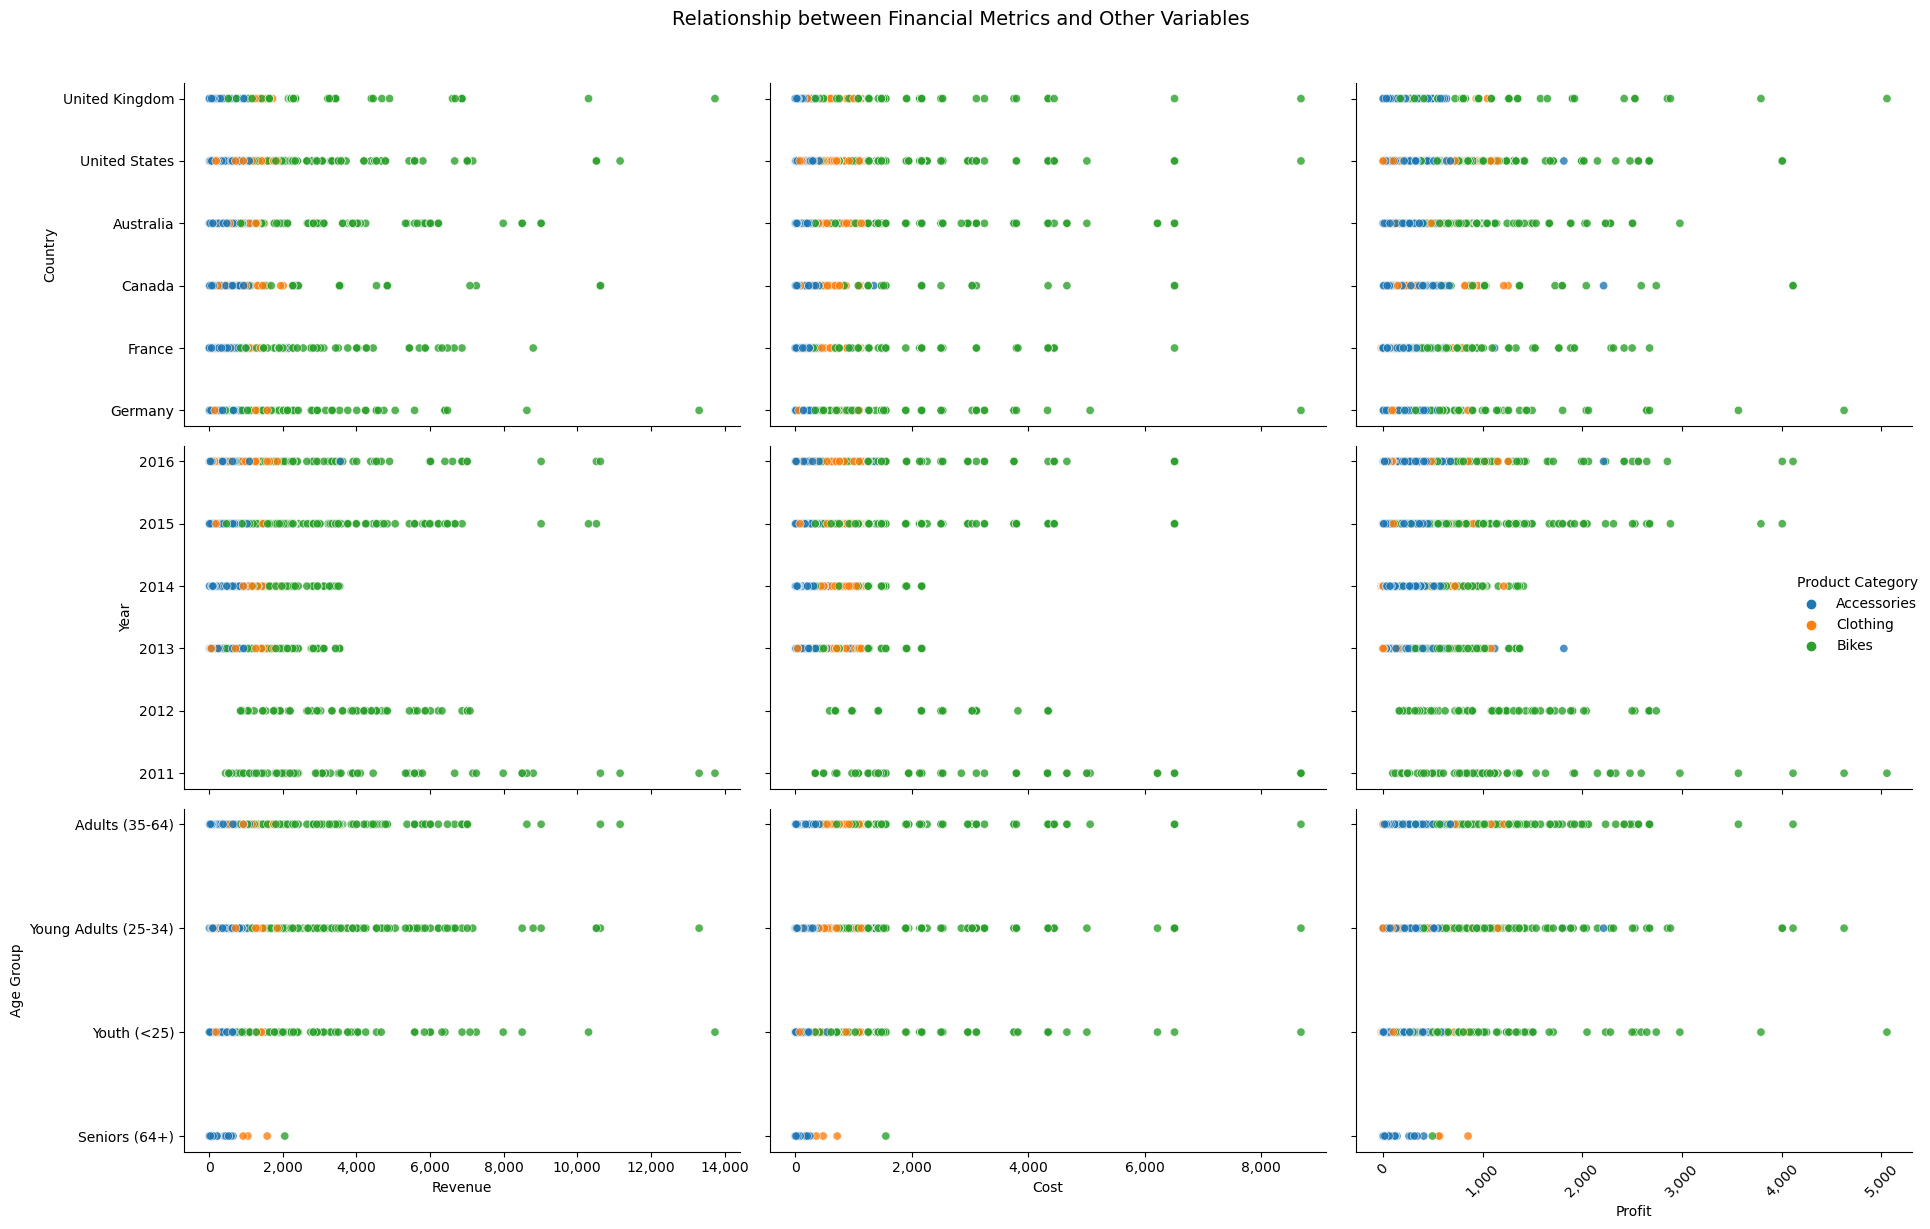

In [25]:
#  Tried to make some pair plots work but I think the data set was too large or possibly not right type of data.
sub_data = bike_data.sample(n=4000, random_state=50)

fncl_pp = sns.pairplot(data=sub_data,
                 x_vars=['Revenue', 'Cost', 'Profit'],
                 y_vars=['Country', 'Year', 'Age Group'],
                 hue='Product Category',
                 height=4,
                 aspect=1.5,
                 plot_kws={'alpha': 0.8},
                 diag_kws={'alpha': 0.6})

fncl_pp.fig.suptitle('Relationship between Financial Metrics and Other Variables', fontsize=14, y=1.02)

for ax in fncl_pp.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [26]:
# Exploring what unique Categories and Countries there were.
prod_cat_unq = bike_data['Product Category'].unique(), bike_data['Country'].unique(), bike_data['Sub Category'].unique()

prod_cat_unq

(array(['Accessories', 'Clothing', 'Bikes'], dtype=object),
 array(['Canada', 'Australia', 'United States', 'Germany', 'France',
        'United Kingdom'], dtype=object),
 array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
        'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
        'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
        'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object))

In [27]:
# Filtering the bike_data into a df I could use to create some box plots, for revenue for bikes.
bike_srt = bike_data[bike_data['Product Category'] == 'Bikes']

bike_srt_val = bike_srt.sort_values('Revenue', ascending=False)

top_n = 10
top_bike_rev = bike_srt_val.head(top_n)

top_bike_rev 


,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
71129,2011-07-08,22,Youth (<25),M,Canada,Bikes,Road Bikes,4,8684,14312,5628,2011,7
59919,2011-03-20,29,Young Adults (25-34),F,Germany,Bikes,Road Bikes,4,8684,14169,5485,2011,3
70699,2011-07-17,30,Young Adults (25-34),F,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,7
70601,2011-09-30,19,Youth (<25),F,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,9
68671,2011-07-05,26,Young Adults (25-34),M,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,7
70745,2011-02-11,39,Adults (35-64),M,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,2
70307,2011-04-30,44,Adults (35-64),M,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,4
70597,2011-05-12,19,Youth (<25),F,Canada,Bikes,Road Bikes,4,8684,14169,5485,2011,5
58359,2011-03-27,24,Youth (<25),M,United States,Bikes,Road Bikes,4,8684,14026,5342,2011,3
71269,2011-01-17,30,Young Adults (25-34),M,United States,Bikes,Road Bikes,4,8684,14026,5342,2011,1


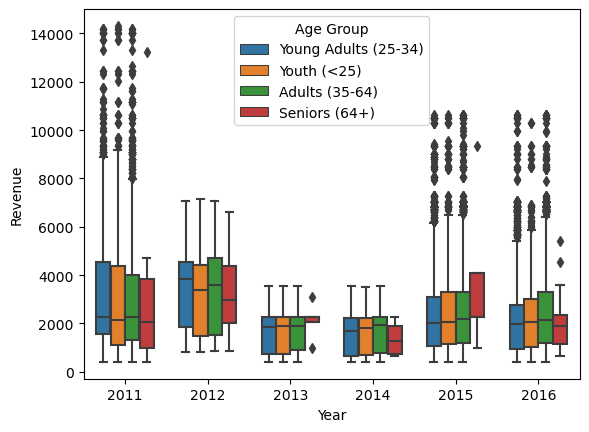

In [28]:
sns.boxplot(x='Year', y='Revenue', hue='Age Group',width=0.7, data=bike_srt);

In [29]:
# Filtering the bike_data into a df I could use to create some box plots, for revenue for accessories.
acc_srt = bike_data[bike_data['Product Category'] == 'Accessories']

acc_srt_val = acc_srt.sort_values('Revenue', ascending=False)

top_n = 10
top_acc_rev = acc_srt_val.head(top_n)

top_acc_rev 


,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
245,2016-01-07,31,Young Adults (25-34),M,Canada,Accessories,Bike Racks,30,1350,3564,2214,2016,1
182,2014-01-17,53,Adults (35-64),F,United States,Accessories,Bike Racks,30,1350,3528,2178,2014,1
90,2014-02-12,46,Adults (35-64),M,United States,Accessories,Bike Racks,30,1350,3528,2178,2014,2
244,2014-01-07,31,Young Adults (25-34),M,Canada,Accessories,Bike Racks,29,1305,3445,2140,2014,1
183,2016-01-17,53,Adults (35-64),F,United States,Accessories,Bike Racks,29,1305,3410,2105,2016,1
95,2015-09-23,41,Adults (35-64),F,Germany,Accessories,Bike Racks,29,1305,3236,1931,2015,9
327,2016-01-26,35,Adults (35-64),F,United Kingdom,Accessories,Bike Racks,28,1260,3226,1966,2016,1
339,2016-06-11,45,Adults (35-64),F,Canada,Accessories,Bike Racks,27,1215,3208,1993,2016,6
101,2016-05-11,32,Young Adults (25-34),M,United States,Accessories,Bike Racks,27,1215,3175,1960,2016,5
91,2016-02-12,46,Adults (35-64),M,United States,Accessories,Bike Racks,27,1215,3175,1960,2016,2


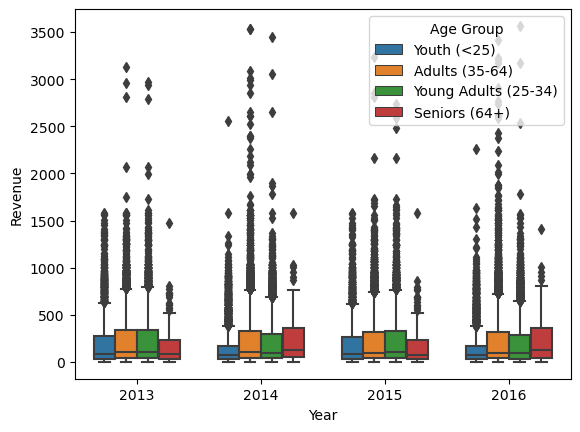

In [30]:
sns.boxplot(x='Year', y='Revenue', hue='Age Group',width=0.7, data=acc_srt);

In [31]:
#  # Filtering the bike_data into a df I could use to create some box plots, for revenue for clothing.
clth_srt = bike_data[bike_data['Product Category'] == 'Clothing']

clth_srt_val = clth_srt.sort_values('Revenue', ascending=False)

top_n = 10
top_clth_rev = clth_srt_val.head(top_n)

top_clth_rev 


,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
112073,2015-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,29,42978,58074,15096,2015,7
112072,2013-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,27,40014,54069,14055,2013,7
73239,2015-11-27,22,Youth (<25),M,Canada,Clothing,Shorts,31,806,2148,1342,2015,11
72947,2016-04-20,42,Adults (35-64),F,United States,Clothing,Shorts,31,806,2127,1321,2016,4
72285,2015-09-19,32,Young Adults (25-34),F,United States,Clothing,Shorts,31,806,2127,1321,2015,9
72595,2016-05-12,37,Adults (35-64),M,United States,Clothing,Shorts,31,806,2127,1321,2016,5
73005,2015-11-26,58,Adults (35-64),M,United States,Clothing,Shorts,31,806,2127,1321,2015,11
72785,2015-12-25,45,Adults (35-64),M,United States,Clothing,Shorts,31,806,2127,1321,2015,12
71779,2015-10-02,17,Youth (<25),F,United States,Clothing,Shorts,31,806,2127,1321,2015,10
73043,2015-10-19,19,Youth (<25),F,United States,Clothing,Shorts,31,806,2127,1321,2015,10


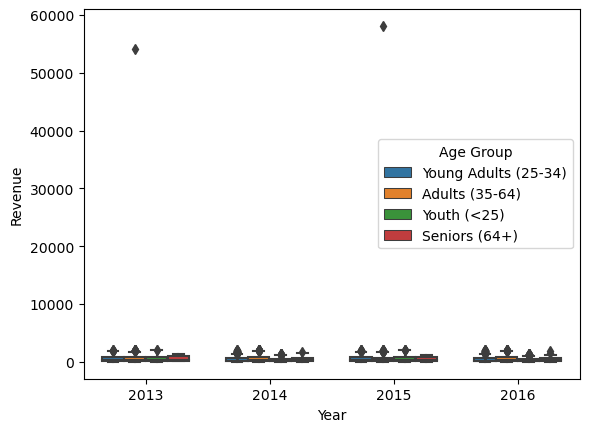

In [32]:
sns.boxplot(x='Year', y='Revenue', hue='Age Group',width=0.7, data=clth_srt);
# The box plot chart here I could see there seems to be an issue with the data in clothing.

# Investigate Clothing Revenue Anomaly

In [34]:
# I could see that the top two results in clth_srt were Vests in Australia so I created a mask an sorted make sure which rows it was.
vest_msk = (bike_data['Sub Category'] == 'Vests') & (bike_data['Country'] == 'Australia')

vest_filt = bike_data[vest_msk]

vest_srt = vest_filt.sort_values('Cost', ascending=False)

vest_srt



,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
112073,2015-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,29,42978,58074,15096,2015,7
112072,2013-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,27,40014,54069,14055,2013,7
112143,2016-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,32,768,1782,1014,2016,2
112142,2014-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,30,720,1670,950,2014,2
112554,2014-01-24,37,Adults (35-64),F,Australia,Clothing,Vests,30,720,1517,797,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112992,2013-07-09,27,Young Adults (25-34),M,Australia,Clothing,Vests,1,24,51,27,2013,7
112993,2015-07-09,27,Young Adults (25-34),M,Australia,Clothing,Vests,1,24,51,27,2015,7
112887,2016-03-14,31,Young Adults (25-34),M,Australia,Clothing,Vests,1,24,51,27,2016,3
112145,2015-10-12,35,Adults (35-64),F,Australia,Clothing,Vests,1,24,54,30,2015,10


In [35]:
#  I then left out the top two rows by filtering the cost and the revenue, but also leaving all other metrics the same so I could then calculate
#  the average to be able to replace the values. I thought they were too large just to remove them.
vst = bike_data[(bike_data['Country'] == 'Australia') & 
                 (bike_data['Product Category'] == 'Clothing') & 
                 (bike_data['Sub Category'] == 'Vests') & 
                 (bike_data['Age Group'] == 'Adults (35-64)') &
                 (bike_data['Cost'] <= 1000) & 
                 (bike_data['Revenue'] <= 3000)]  

vst_aus_srt = vst.sort_values('Cost', ascending=False)
vst_aus_srt

,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
112143,2016-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,32,768,1782,1014,2016,2
112554,2014-01-24,37,Adults (35-64),F,Australia,Clothing,Vests,30,720,1517,797,2014,1
112400,2014-06-11,35,Adults (35-64),F,Australia,Clothing,Vests,30,720,1670,950,2014,6
112142,2014-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,30,720,1670,950,2014,2
112777,2016-01-06,44,Adults (35-64),M,Australia,Clothing,Vests,30,720,1670,950,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112745,2016-03-11,49,Adults (35-64),M,Australia,Clothing,Vests,2,48,105,57,2016,3
112315,2016-02-10,37,Adults (35-64),M,Australia,Clothing,Vests,1,24,56,32,2016,2
112302,2014-01-20,39,Adults (35-64),F,Australia,Clothing,Vests,1,24,51,27,2014,1
112303,2016-01-20,39,Adults (35-64),F,Australia,Clothing,Vests,1,24,51,27,2016,1


In [36]:
#  Here I calculated the average and created an f string to make it more legible rather than just two figures.
flt_vest = bike_data[(bike_data['Country'] == 'Australia') & 
                 (bike_data['Product Category'] == 'Clothing') & 
                 (bike_data['Sub Category'] == 'Vests') & 
                 (bike_data['Age Group'] == 'Adults (35-64)') &
                 (bike_data['Cost'] <= 1000) & 
                 (bike_data['Revenue'] <= 3000)]  



total_rev = flt_vest['Revenue'].sum()
total_cst = flt_vest['Cost'].sum()
total_order_qty = flt_vest['Order Quantity'].sum()


avg_rev_per_item = total_rev / total_order_qty
avg_cst_per_item = total_cst / total_order_qty

print(f"Average Revenue per item for Vests in Australia (Adults 35-64): ${avg_rev_per_item:.2f}")
print(f"Average Cost per item for Vests in Australia (Adults 35-64): ${avg_cst_per_item:.2f}")

Average Revenue per item for Vests in Australia (Adults 35-64): $53.83
Average Cost per item for Vests in Australia (Adults 35-64): $24.00


In [37]:
# Just checking here index row numbers.
clth_srt = bike_data[bike_data['Product Category'] == 'Clothing']

clth_srt_val = clth_srt.sort_values('Revenue', ascending=False)

top_n = 5
top_clth_rev = clth_srt_val.head(top_n)

top_clth_rev 

,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
112073,2015-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,29,42978,58074,15096,2015,7
112072,2013-07-24,52,Adults (35-64),M,Australia,Clothing,Vests,27,40014,54069,14055,2013,7
73239,2015-11-27,22,Youth (<25),M,Canada,Clothing,Shorts,31,806,2148,1342,2015,11
72947,2016-04-20,42,Adults (35-64),F,United States,Clothing,Shorts,31,806,2127,1321,2016,4
72285,2015-09-19,32,Young Adults (25-34),F,United States,Clothing,Shorts,31,806,2127,1321,2015,9


In [38]:
#  Found Row numbers and used .loc to replace the 3 financial rows that seemed very heavily skewed.
rows_to_update = [112072, 112073]

new_vest_rev_total = avg_rev_per_item * bike_data.loc[rows_to_update, 'Order Quantity']
new_vest_cst_total = avg_cst_per_item * bike_data.loc[rows_to_update, 'Order Quantity']


bike_data.loc[rows_to_update, 'Revenue'] = new_vest_rev_total
bike_data.loc[rows_to_update, 'Cost'] = new_vest_cst_total
bike_data.loc[rows_to_update, 'Profit'] = new_vest_rev_total - new_vest_cst_total


print(bike_data.loc[rows_to_update])



             Date  Customer Age       Age Group Customer Gender    Country  \
112072 2013-07-24            52  Adults (35-64)               M  Australia   
112073 2015-07-24            52  Adults (35-64)               M  Australia   

       Product Category Sub Category  Order Quantity  Cost      Revenue  \
112072         Clothing        Vests              27   648  1453.468235   
112073         Clothing        Vests              29   696  1561.132549   

            Profit  Year  Month  
112072  805.468235  2013      7  
112073  865.132549  2015      7  


In [39]:
# Checking the data replacement.
updated_vest_msk = (bike_data['Sub Category'] == 'Vests') & (bike_data['Country'] == 'Australia')

updated_vest_filt = bike_data[updated_vest_msk]

updated_vest_srt = updated_vest_filt.sort_values('Revenue', ascending=False)

updated_vest_srt.head()

,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
112143,2016-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,32,768,1782.0,1014.0,2016,2
112142,2014-02-16,38,Adults (35-64),F,Australia,Clothing,Vests,30,720,1670.0,950.0,2014,2
112777,2016-01-06,44,Adults (35-64),M,Australia,Clothing,Vests,30,720,1670.0,950.0,2016,1
112400,2014-06-11,35,Adults (35-64),F,Australia,Clothing,Vests,30,720,1670.0,950.0,2014,6
112401,2016-06-11,35,Adults (35-64),F,Australia,Clothing,Vests,29,696,1615.0,919.0,2016,6


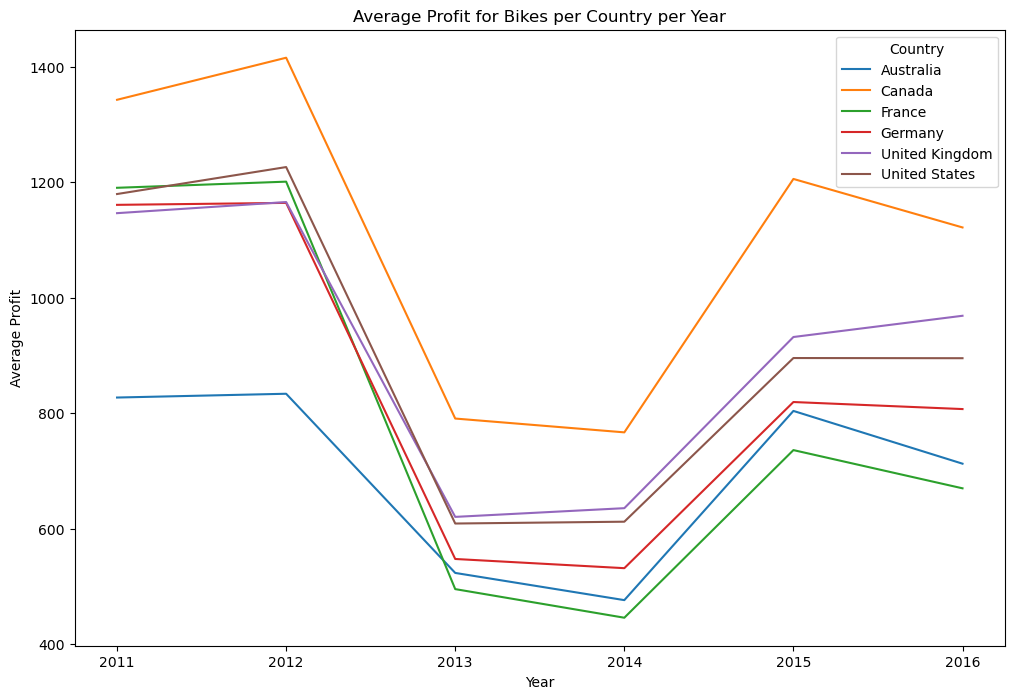

In [40]:
#  Trying out a couple of line graphs to see how they look, not sure. 
avg_p_bike_year = bike_srt.groupby(['Year', 'Country'])['Profit'].mean().unstack()

avg_p_bike_year.plot(figsize=(12, 8))

plt.title('Average Profit for Bikes per Country per Year')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.show()

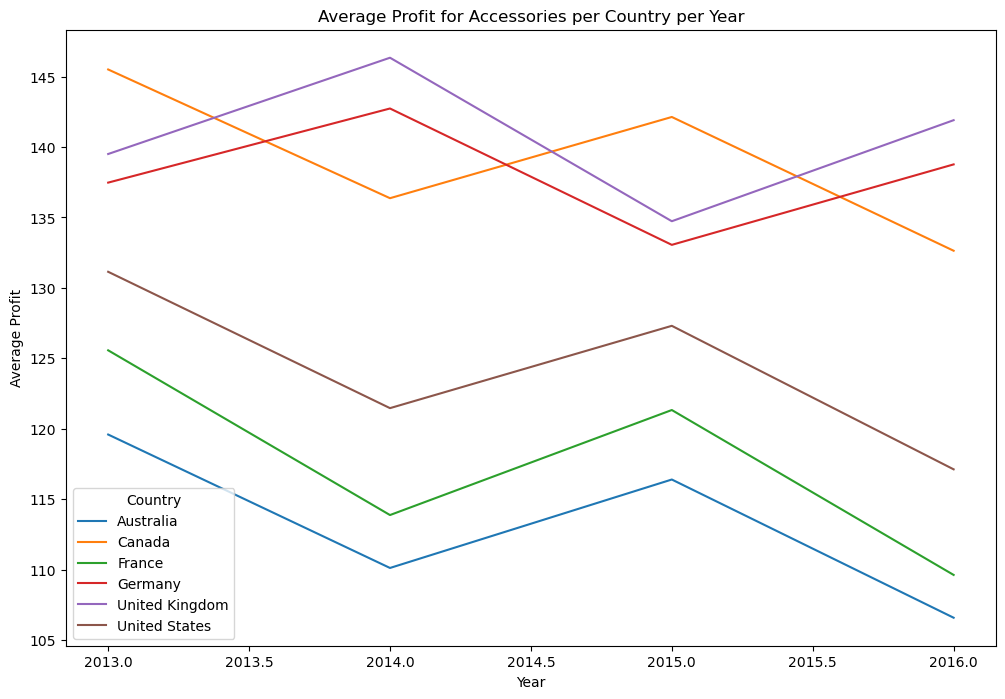

In [41]:
avg_p_acc_year = acc_srt.groupby(['Year', 'Country'])['Profit'].mean().unstack()

avg_p_acc_year.plot(figsize=(12, 8))

plt.title('Average Profit for Accessories per Country per Year')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.show()

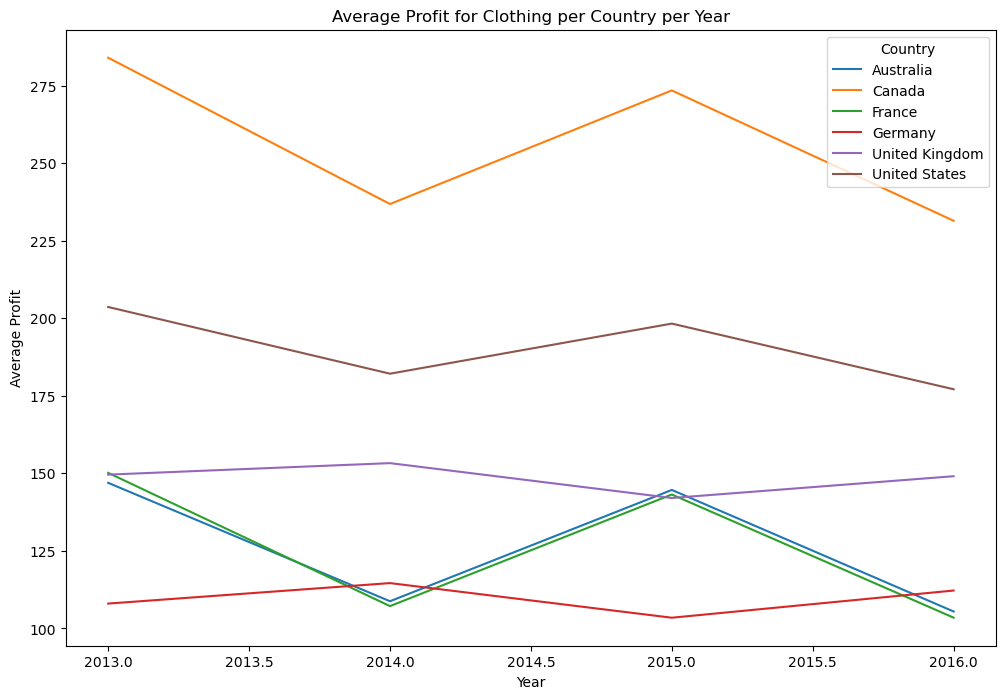

In [42]:
avg_p_clth_year = clth_srt.groupby(['Year', 'Country'])['Profit'].mean().unstack()

avg_p_clth_year.plot(figsize=(12, 8))

plt.title('Average Profit for Clothing per Country per Year')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.show()

# Data Visuals for Presentation 

In [44]:
bike_data.describe()

,Date,Customer Age,Order Quantity,Cost,Revenue,Profit,Year,Month
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,35.919212,11.901660,468.596376,753.404929,284.808553,2014.401739,6.453024
min,2011-01-01 00:00:00,17.000000,1.000000,1.000000,2.000000,-30.000000,2011.000000,1.000000
25%,2013-12-22 00:00:00,28.000000,2.000000,28.000000,63.000000,29.000000,2013.000000,4.000000
50%,2014-06-27 00:00:00,35.000000,10.000000,108.000000,223.000000,101.000000,2014.000000,6.000000
75%,2016-01-09 00:00:00,43.000000,20.000000,432.000000,800.000000,358.000000,2016.000000,10.000000
max,2016-07-31 00:00:00,87.000000,32.000000,8684.000000,14312.000000,5638.000000,2016.000000,12.000000
std,NaN,11.021936,9.561857,867.852336,1288.225449,449.889977,1.272510,3.478198


In [81]:
# Grouping and revealing top profit sub categories for bikes using previous filtered df. 
grp_top_p = bike_srt.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

srt_c_p = grp_top_p.sort_values(['Country', 'Profit'], ascending=[True, False])

srt_sub_b = srt_c_p.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_p_bike = srt_sub_b[srt_sub_b['Country'].isin(countries_inc)]

top_p_bike

,Country,Sub Category,Profit
1,Australia,Road Bikes,2608195
0,Australia,Mountain Bikes,1857640
2,Australia,Touring Bikes,371522
4,Canada,Road Bikes,936657
3,Canada,Mountain Bikes,570377
5,Canada,Touring Bikes,183928
7,France,Road Bikes,947900
6,France,Mountain Bikes,749088
8,France,Touring Bikes,213759
10,Germany,Road Bikes,1088861


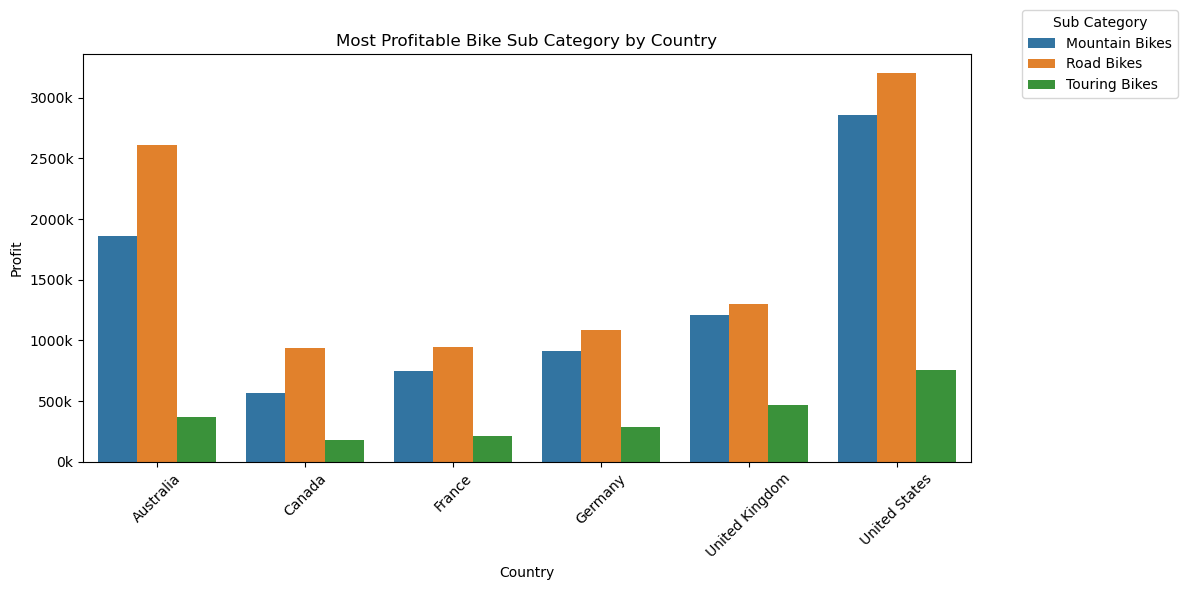

In [91]:
# Created a Seaborn box plot as a boxplot showed the data in the best way. This shows bike sub category by country in thousands.
grp_b_p_top = top_p_bike.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Profit', hue='Sub Category', data = grp_b_p_top)

def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.title('Most Profitable Bike Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Profit')

plt.xticks(rotation=45)

plt.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='center left')


plt.tight_layout()
plt.show()


In [93]:
# Grouping and revealing top profit sub categories for accessories using previous filtered df.
grp_top_p_a = acc_srt.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

srt_c_p_a = grp_top_p_a.sort_values(['Country', 'Profit'], ascending=[True, False])

srt_sub_a = srt_c_p_a.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_p_acc = srt_sub_a[srt_sub_a['Country'].isin(countries_inc)]

top_p_acc

,Country,Sub Category,Profit
5,Australia,Helmets,570747
7,Australia,Tires and Tubes,460881
2,Australia,Bottles and Cages,143408
13,Canada,Helmets,471507
15,Canada,Tires and Tubes,461468
12,Canada,Fenders,163968
21,France,Helmets,340492
23,France,Tires and Tubes,254480
18,France,Bottles and Cages,64547
29,Germany,Helmets,389809


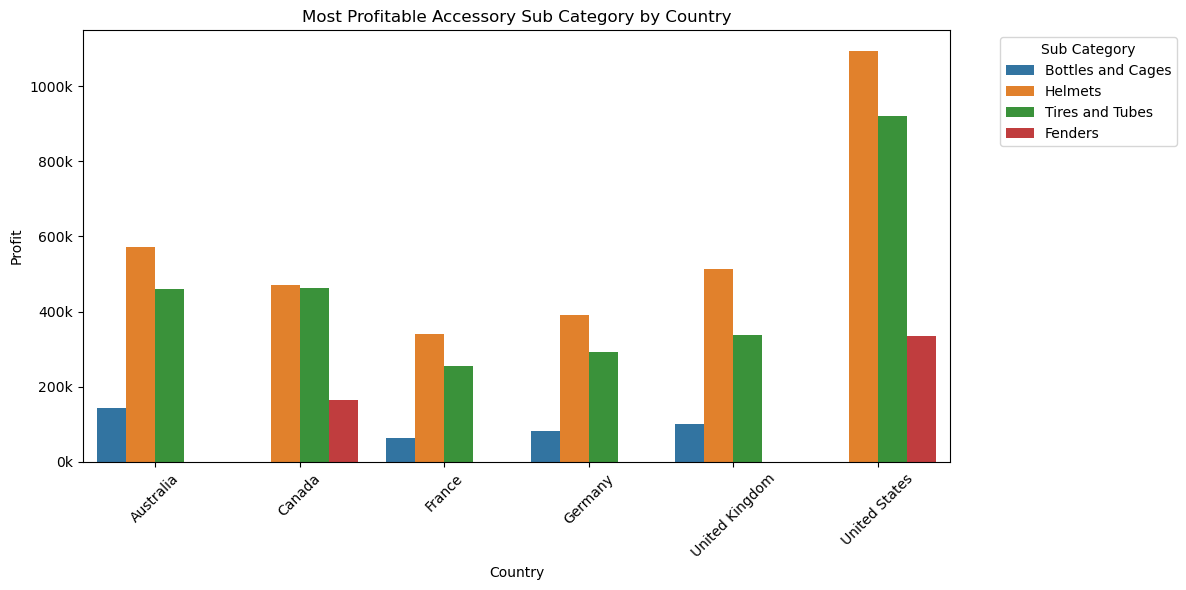

In [95]:
# Created a Seaborn box plot as a box plot showed the data in the best way. This shows accessory sub category by country in thousands.
grp_a_p_top = top_p_acc.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Profit', hue='Sub Category', data = grp_a_p_top)

def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.title('Most Profitable Accessory Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Profit')

plt.xticks(rotation=45)

plt.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [97]:
# Grouping and revealing top profit sub categories for clothing using previous filtered df.
grp_top_p_c = clth_srt.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

srt_c_p_cl = grp_top_p_c.sort_values(['Country', 'Profit'], ascending=[True, False])

srt_sub_c = srt_c_p_cl.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_p_clth = srt_sub_c[srt_sub_c['Country'].isin(countries_inc)]

top_p_clth

,Country,Sub Category,Profit
3,Australia,Shorts,127000
5,Australia,Vests,114548
1,Australia,Gloves,90102
9,Canada,Shorts,272322
8,Canada,Jerseys,128217
7,Canada,Gloves,96046
15,France,Shorts,56521
17,France,Vests,46227
14,France,Jerseys,41656
20,Germany,Jerseys,55400


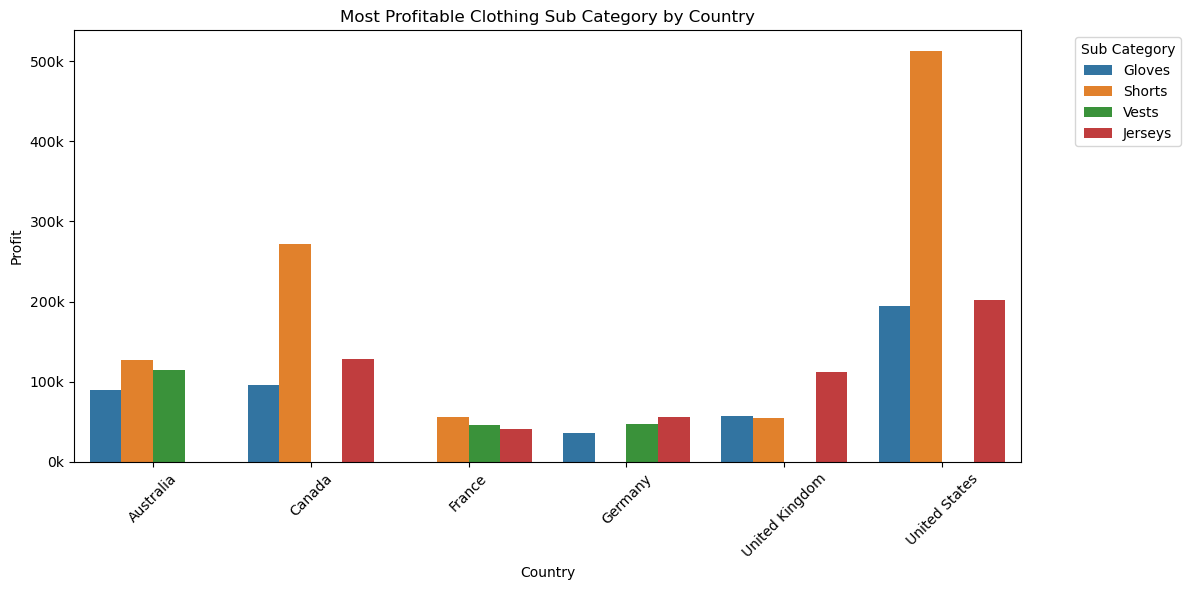

In [99]:
#  Created a Seaborn box plot as a box plot showed the data in the best way. This shows clothing sub category by country in thousands.
grp_c_p_top = top_p_clth.groupby(['Country', 'Sub Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Profit', hue='Sub Category', data = grp_c_p_top)

def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.title('Most Profitable Clothing Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Profit')

plt.xticks(rotation=45)

plt.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [101]:
#  Now drilling down for revenue per sub category in each country. 
grp_top_r = bike_srt.groupby(['Country', 'Sub Category'])['Revenue'].sum().reset_index()

srt_c_r = grp_top_r.sort_values(['Country', 'Revenue'], ascending=[True, False])

srt_sub_b_r = srt_c_r.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_r_bike = srt_sub_b_r[srt_sub_b_r['Country'].isin(countries_inc)]

top_r_bike

,Country,Sub Category,Revenue
1,Australia,Road Bikes,10094543
0,Australia,Mountain Bikes,5413747
2,Australia,Touring Bikes,1444528
4,Canada,Road Bikes,2509887
3,Canada,Mountain Bikes,1270946
5,Canada,Touring Bikes,494170
7,France,Road Bikes,3460617
6,France,Mountain Bikes,2083968
8,France,Touring Bikes,779540
10,Germany,Road Bikes,3543905


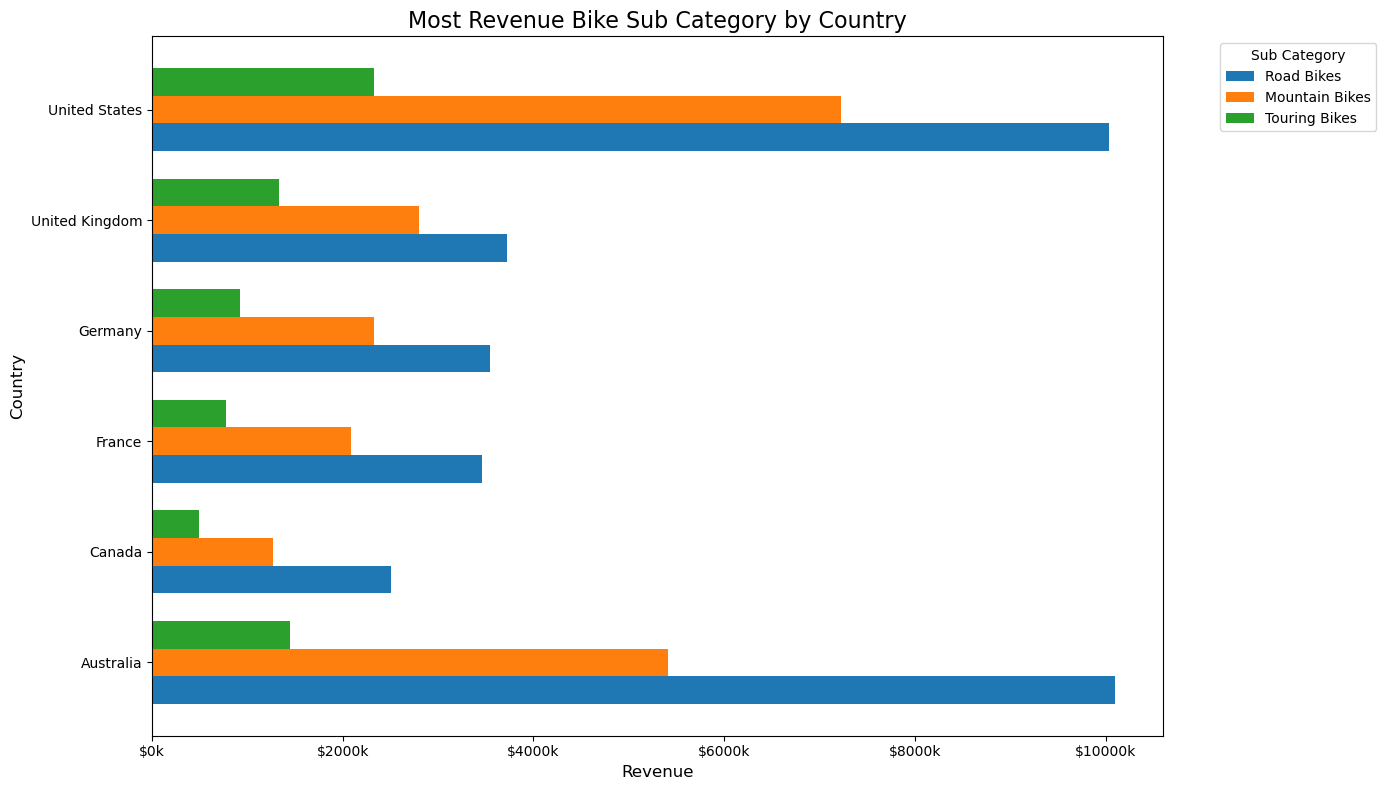

In [127]:
# used a matplotlib horizontal bar chart for this revenue visual
fig, ax = plt.subplots(figsize=(14, 8))

countries = top_r_bike['Country'].unique()
sub_categories = top_r_bike['Sub Category'].unique()

bar_width = 0.25
r = np.arange(len(countries))

for i, sub_cat in enumerate(sub_categories):
    data = top_r_bike[top_r_bike['Sub Category'] == sub_cat]
    ax.barh([x + i * bar_width for x in r], data['Revenue'], 
            height=bar_width, label=sub_cat)

def thousands_formatter(x, pos):
    return f'${x/1000:.0f}k'

ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax.set_title('Most Revenue Bike Sub Category by Country', fontsize=16)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

ax.set_yticks([x + bar_width for x in r])
ax.set_yticklabels(countries)

ax.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [103]:
#  Now drilling down for revenue per sub category in each country. 
grp_top_r_a = acc_srt.groupby(['Country', 'Sub Category'])['Revenue'].sum().reset_index()

srt_c_r_a = grp_top_r_a.sort_values(['Country', 'Revenue'], ascending=[True, False])

srt_sub_a_r = srt_c_r_a.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_r_acc = srt_sub_a_r[srt_sub_a_r['Country'].isin(countries_inc)]

top_r_acc

,Country,Sub Category,Revenue
5,Australia,Helmets,1025396
7,Australia,Tires and Tubes,839509
2,Australia,Bottles and Cages,262153
13,Canada,Helmets,754569
15,Canada,Tires and Tubes,745526
12,Canada,Fenders,259208
21,France,Helmets,601948
23,France,Tires and Tubes,457167
18,France,Bottles and Cages,116477
29,Germany,Helmets,662913


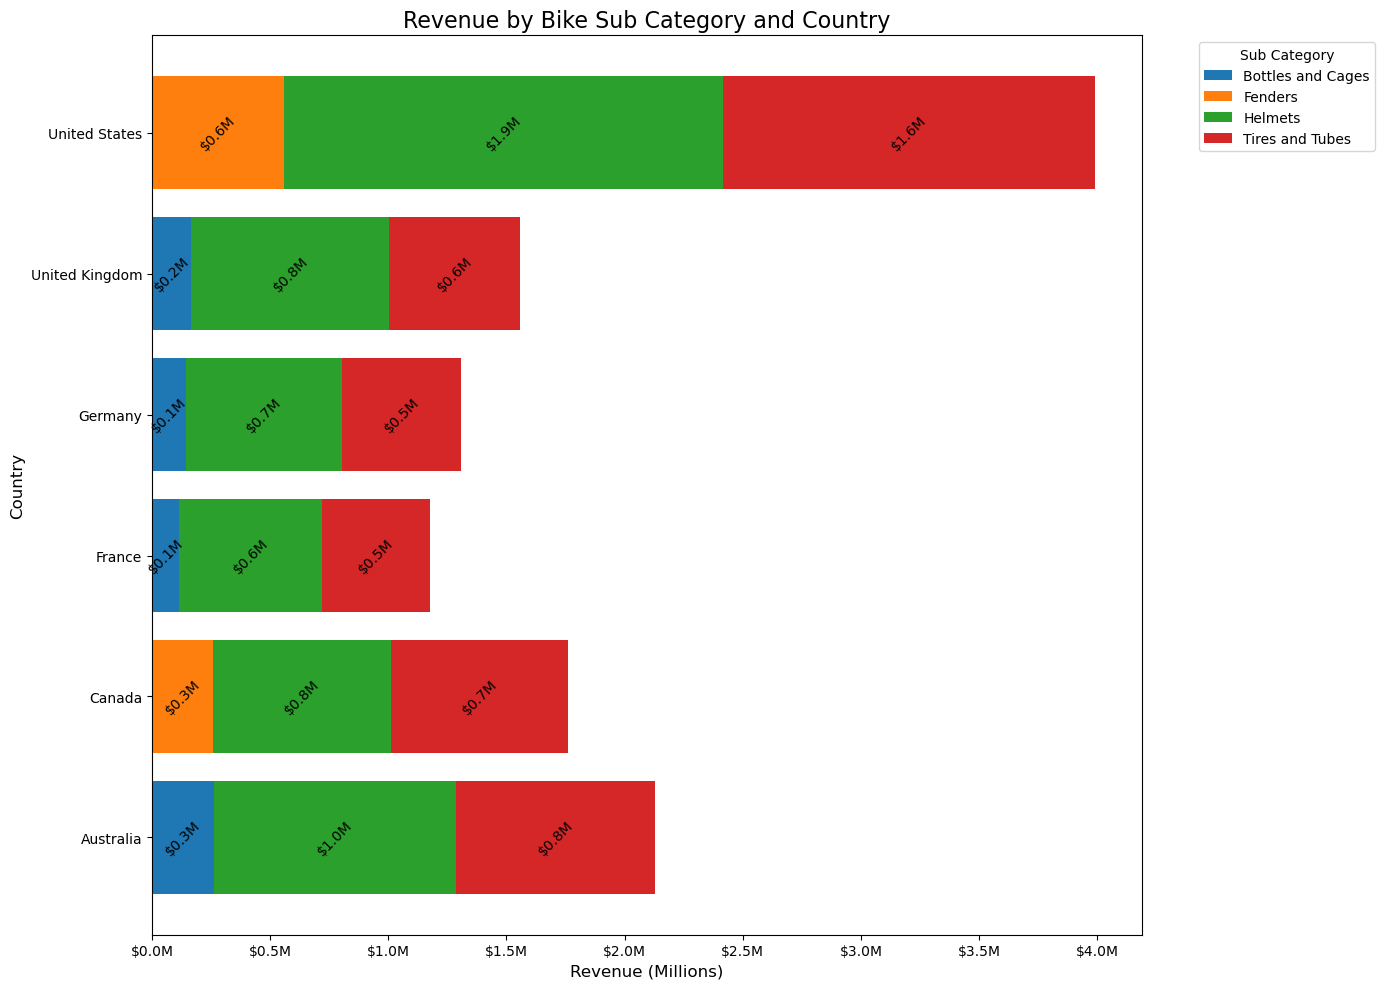

In [133]:
# used a matplotlib horizontal bar chart for this revenue visual, had to change the style as too many bars.
pivot_data = top_r_acc.pivot(index='Country', columns='Sub Category', values='Revenue').fillna(0)

fig, ax = plt.subplots(figsize=(14, 10))

countries = pivot_data.index
sub_categories = pivot_data.columns

bar_height = 0.8
y_positions = range(len(countries))

left = pd.Series(0, index=countries)
for sub_cat in sub_categories:
    ax.barh(y_positions, pivot_data[sub_cat], left=left, height=bar_height, label=sub_cat)
    left += pivot_data[sub_cat]

def thousands_formatter(x, pos):
    return f'${x/1e6:.1f}M'

ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax.set_title('Revenue by Bike Sub Category and Country', fontsize=16)
ax.set_xlabel('Revenue (Millions)', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

ax.set_yticks(y_positions)
ax.set_yticklabels(countries)

ax.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, country in enumerate(countries):
    total = 0
    for sub_cat in sub_categories:
        value = pivot_data.loc[country, sub_cat]
        if value > 0:
            ax.text(total + value/2, i, f'${value/1e6:.1f}M', 
                    ha='center', va='center',rotation=45)
        total += value

plt.tight_layout()
plt.show()

In [121]:
#  Now drilling down for revenue per sub category in each country. 
grp_top_r_c = clth_srt.groupby(['Country', 'Sub Category'])['Revenue'].sum().reset_index()

srt_c_r_cl = grp_top_r_c.sort_values(['Country', 'Revenue'], ascending=[True, False])

srt_sub_c_r = srt_c_r_cl.groupby('Country').head(3)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_r_clth = srt_sub_c_r[srt_sub_c_r['Country'].isin(countries_inc)]

top_r_clth

,Country,Sub Category,Revenue
2,Australia,Jerseys,816339
5,Australia,Vests,266732
3,Australia,Shorts,228426
8,Canada,Jerseys,566425
9,Canada,Shorts,435836
7,Canada,Gloves,154600
14,France,Jerseys,412346
15,France,Shorts,99447
17,France,Vests,81435
20,Germany,Jerseys,394798


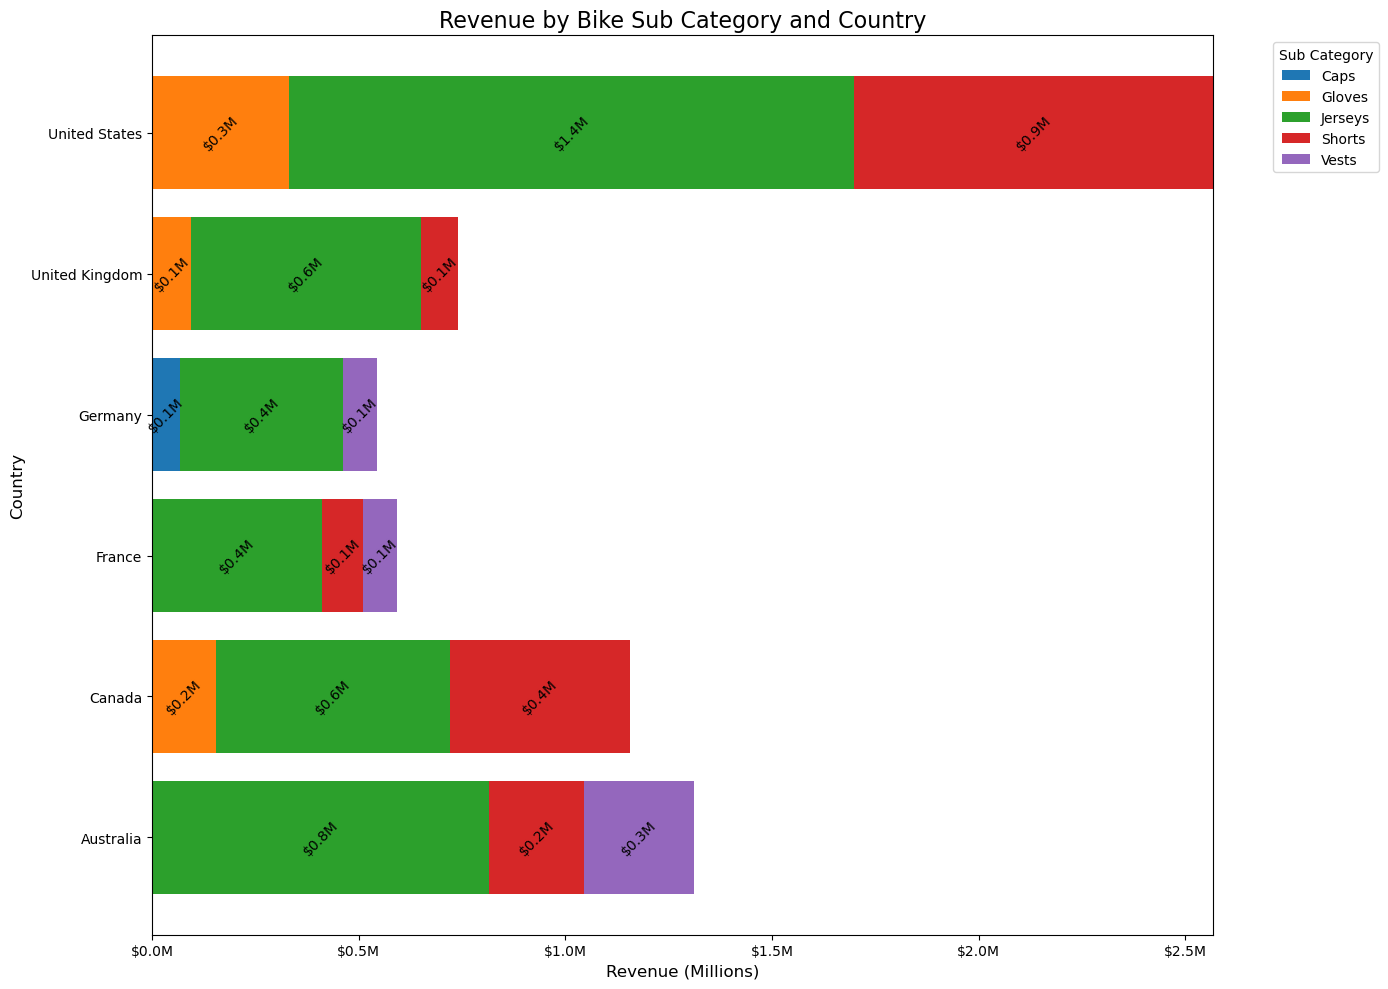

In [131]:
# copied from chart above and used a matplotlib horizontal bar chart for this revenue visual, had to change the style as too many bars.
pivot_data = top_r_clth.pivot(index='Country', columns='Sub Category', values='Revenue').fillna(0)

fig, ax = plt.subplots(figsize=(14, 10))

countries = pivot_data.index
sub_categories = pivot_data.columns

bar_height = 0.8
y_positions = range(len(countries))

left = pd.Series(0, index=countries)
for sub_cat in sub_categories:
    ax.barh(y_positions, pivot_data[sub_cat], left=left, height=bar_height, label=sub_cat)
    left += pivot_data[sub_cat]

def thousands_formatter(x, pos):
    return f'${x/1e6:.1f}M'

ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax.set_title('Revenue by Bike Sub Category and Country', fontsize=16)
ax.set_xlabel('Revenue (Millions)', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

ax.set_yticks(y_positions)
ax.set_yticklabels(countries)

ax.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, country in enumerate(countries):
    total = 0
    for sub_cat in sub_categories:
        value = pivot_data.loc[country, sub_cat]
        if value > 0:
            ax.text(total + value/2, i, f'${value/1e6:.1f}M', 
                    ha='center', va='center', rotation=45)
        total += value

plt.tight_layout()
plt.show()

In [135]:
# Now grouping some metrics for comparison age groups for bike sub categories with all the countries.
grp_top_age = bike_srt.groupby(['Country', 'Sub Category'])['Age Group'].value_counts().reset_index()

srt_b_age = grp_top_age.sort_values(['Country', 'Age Group'], ascending=[True, False])

srt_sub_b_age = srt_b_age.groupby('Country').head(8)

countries_inc = ['Canada', 'Germany', 'United States', 'France', 'United Kingdom', 'Australia']

top_age_bike = srt_sub_b_age[srt_sub_b_age['Country'].isin(countries_inc)]

top_age_bike

,Country,Sub Category,Age Group,count
2,Australia,Mountain Bikes,Youth (<25),424
5,Australia,Road Bikes,Youth (<25),870
9,Australia,Touring Bikes,Youth (<25),132
1,Australia,Mountain Bikes,Young Adults (25-34),834
4,Australia,Road Bikes,Young Adults (25-34),1298
8,Australia,Touring Bikes,Young Adults (25-34),266
6,Australia,Road Bikes,Seniors (64+),16
0,Australia,Mountain Bikes,Adults (35-64),898
12,Canada,Mountain Bikes,Youth (<25),44
16,Canada,Road Bikes,Youth (<25),100


In [161]:
top_age_bike.describe()

,count
count,48.000000
mean,331.791667
std,343.185389
min,2.000000
25%,48.500000
50%,211.000000
75%,456.000000
max,1298.000000


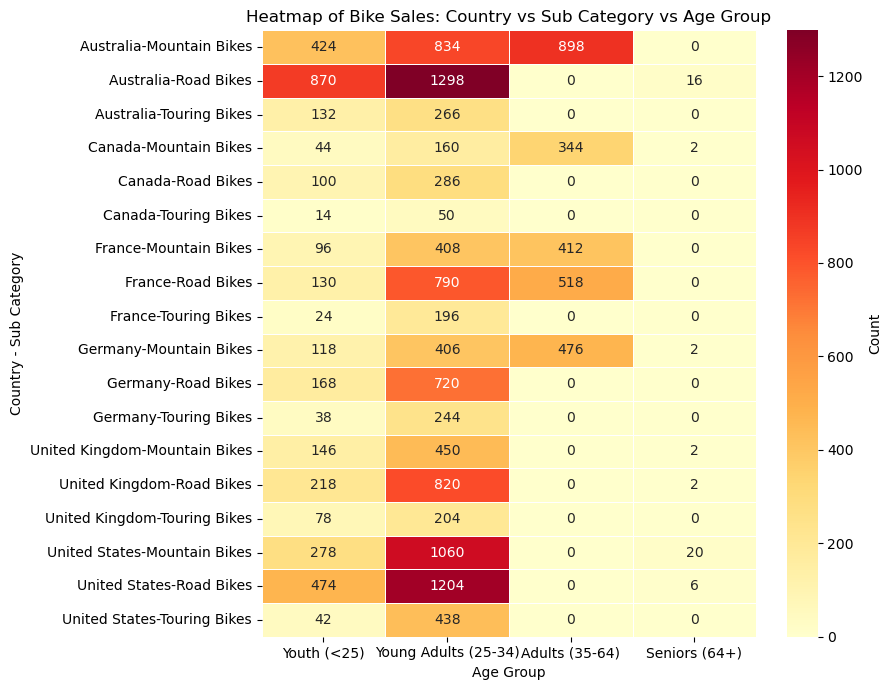

In [165]:
#  Created a heat map rather than just doing a table for the presentation.
age_order = ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']

heatmap_data = top_age_bike.pivot_table(values='count', 
                                        index=['Country', 'Sub Category'], 
                                        columns='Age Group', 
                                        fill_value=0)

heatmap_data = heatmap_data.reindex(columns=age_order)

plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Count'})

plt.title('Heatmap of Bike Sales: Country vs Sub Category vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Country - Sub Category')

plt.tight_layout()

plt.show()

In [167]:
#  Tried here to get some percentages of the above data, so I could quote in the presentation.
country_totals = top_age_bike.groupby('Country')['count'].sum()

sub_category_by_country = top_age_bike.groupby(['Country', 'Sub Category'])['count'].sum().unstack(fill_value=0)
sub_category_by_country_pct = sub_category_by_country.div(country_totals, axis=0) * 100

age_by_country = top_age_bike.groupby(['Country', 'Age Group'])['count'].sum().unstack(fill_value=0)
age_by_country_pct = age_by_country.div(country_totals, axis=0) * 100

sub_category_by_age = top_age_bike.groupby(['Age Group', 'Sub Category'])['count'].sum().unstack(fill_value=0)
sub_category_by_age_pct = sub_category_by_age.div(sub_category_by_age.sum(axis=1), axis=0) * 100


print("1. Overall Sub Category by Country Breakdown (%):")
print(sub_category_by_country_pct.round(2))
print("\n2. Age Category by Country Breakdown (%):")
print(age_by_country_pct.round(2))
print("\n3. Overall Sub Category by Age Group Breakdown (%):")
print(sub_category_by_age_pct.round(2))




1. Overall Sub Category by Country Breakdown (%):
Sub Category    Mountain Bikes  Road Bikes  Touring Bikes
Country                                                  
Australia                45.50       46.10           8.40
Canada                   55.00       38.60           6.40
France                   35.59       55.87           8.55
Germany                  46.13       40.88          12.98
United Kingdom           31.15       54.17          14.69
United States            38.56       47.81          13.63

2. Age Category by Country Breakdown (%):
Age Group       Adults (35-64)  Seniors (64+)  Young Adults (25-34)  \
Country                                                               
Australia                18.95           0.34                 50.61   
Canada                   34.40           0.20                 49.60   
France                   36.13           0.00                 54.16   
Germany                  21.92           0.09                 63.08   
United Kingdom   

# Graveyard for Code

In [170]:
bike_uk_msk = (bike_data['Country'] == 'United Kingdom') & (bike_data['Product Category'] == 'Bikes')

bike_uk_filt = bike_data[bike_uk_msk]

bike_uk_filt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3524 entries, 49528 to 112071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3524 non-null   datetime64[ns]
 1   Customer Age      3524 non-null   int64         
 2   Age Group         3524 non-null   object        
 3   Customer Gender   3524 non-null   object        
 4   Country           3524 non-null   object        
 5   Product Category  3524 non-null   object        
 6   Sub Category      3524 non-null   object        
 7   Order Quantity    3524 non-null   int64         
 8   Cost              3524 non-null   int64         
 9   Revenue           3524 non-null   float64       
 10  Profit            3524 non-null   float64       
 11  Year              3524 non-null   int32         
 12  Month             3524 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(5)
memory usage:

In [172]:
bike_uk_filt.describe()

,Date,Customer Age,Order Quantity,Cost,Revenue,Profit,Year,Month
count,3524,3524.000000,3524.000000,3524.00000,3524.000000,3524.000000,3524.000000,3524.000000
mean,2014-07-08 01:05:47.332576512,34.728150,1.371453,1385.60017,2229.566969,843.966799,2014.036039,6.293984
min,2011-01-02 00:00:00,17.000000,1.000000,295.00000,518.000000,174.000000,2011.000000,1.000000
25%,2013-08-26 18:00:00,28.000000,1.000000,688.00000,1037.000000,349.000000,2013.000000,3.000000
50%,2014-05-05 00:00:00,34.000000,1.000000,1252.00000,2203.000000,794.000000,2014.000000,6.000000
75%,2015-11-28 06:00:00,41.000000,2.000000,1519.00000,2345.000000,961.000000,2015.000000,9.000000
max,2016-06-30 00:00:00,75.000000,4.000000,8684.00000,13740.000000,5056.000000,2016.000000,12.000000
std,NaN,9.357042,0.693584,1078.52243,1734.153711,669.693525,1.496180,3.504971


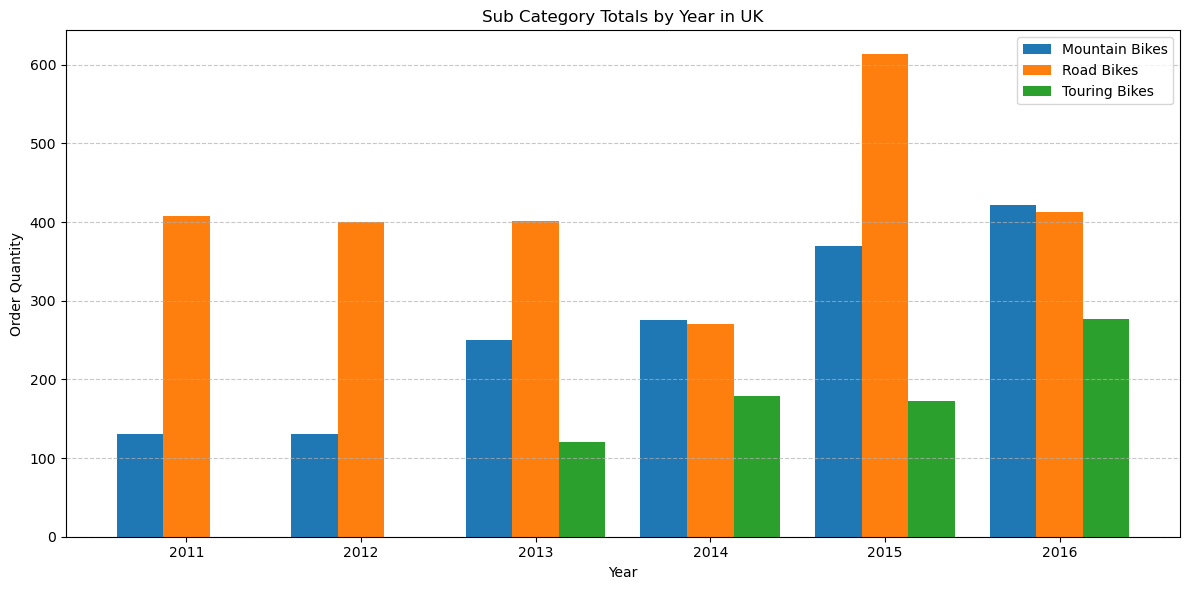

In [174]:
rev_by_year = bike_uk_filt.groupby(['Year', 'Sub Category'])['Order Quantity'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))

n_years = len(rev_by_year)
n_subcats = len(rev_by_year.columns)

width = 0.8 / n_subcats
x = range(n_years)

for i, subcat in enumerate(rev_by_year.columns):
    ax.bar([xi + i * width for xi in x], rev_by_year[subcat], width, label=subcat)

ax.set_xlabel('Year')
ax.set_ylabel('Order Quantity')
ax.set_title('Sub Category Totals by Year in UK')
ax.set_xticks([xi + (n_subcats - 1) * width / 2 for xi in x])
ax.set_xticklabels(rev_by_year.index)
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

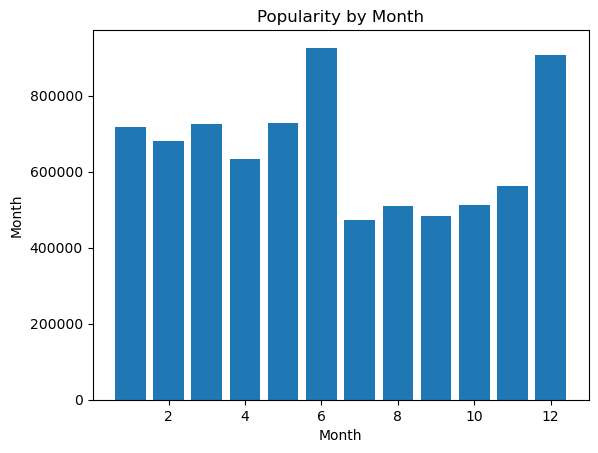

In [176]:
yearly_revenue = bike_uk_filt.groupby('Month')['Revenue'].sum()

plt.bar(yearly_revenue.index, yearly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Month')
plt.title('Popularity by Month')
plt.show()

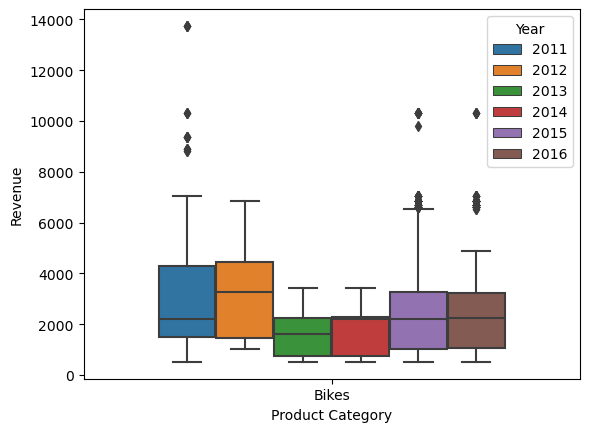

In [178]:
sns.boxplot(x='Product Category', y='Revenue', hue='Year',width=0.7, data=bike_uk_filt);

In [182]:
bike_sales_date = bike_uk_filt.groupby(['Sub Category', 'Year', 'Month'])['Revenue'].sum().reset_index()

bike_sales_date.head()
                        

,Sub Category,Year,Month,Revenue
0,Mountain Bikes,2011,1,20591.0
1,Mountain Bikes,2011,2,15517.0
2,Mountain Bikes,2011,3,3679.0
3,Mountain Bikes,2011,4,5156.0
4,Mountain Bikes,2011,5,13315.0


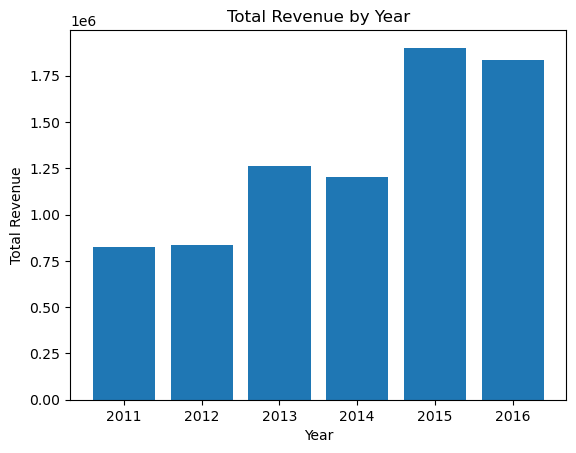

In [184]:
yearly_revenue = bike_sales_date.groupby('Year')['Revenue'].sum()

plt.bar(yearly_revenue.index, yearly_revenue.values)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Year')
plt.show()

In [222]:
rb_msk = (bike_srt['Country'] == 'United Kingdom') & (bike_srt['Sub Category'] == 'Road Bikes')

rb_filt = bike_srt[rb_msk]

rb_filt



,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
58184,2012-12-22,40,Adults (35-64),F,United Kingdom,Bikes,Road Bikes,2,688,1037,349,2012,12
58185,2011-12-22,40,Adults (35-64),F,United Kingdom,Bikes,Road Bikes,3,1032,1555,523,2011,12
58186,2013-06-08,40,Adults (35-64),F,United Kingdom,Bikes,Road Bikes,1,344,518,174,2013,6
58187,2015-06-08,40,Adults (35-64),F,United Kingdom,Bikes,Road Bikes,1,344,518,174,2015,6
58188,2013-06-21,40,Adults (35-64),F,United Kingdom,Bikes,Road Bikes,1,344,518,174,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70949,2015-12-07,56,Adults (35-64),M,United Kingdom,Bikes,Road Bikes,2,688,1037,349,2015,12
70950,2014-05-10,56,Adults (35-64),M,United Kingdom,Bikes,Road Bikes,1,344,518,174,2014,5
70951,2016-05-10,56,Adults (35-64),M,United Kingdom,Bikes,Road Bikes,1,344,518,174,2016,5
70952,2014-06-06,56,Adults (35-64),M,United Kingdom,Bikes,Road Bikes,1,344,518,174,2014,6


In [190]:
def rb_filter_sum(df, start_date, end_date):
  
    filtered_df = rb_filt[(rb_filt['Date'] >= start_date) & (rb_filt['Date'] <= end_date) & (rb_filt['Cost'] > 1500)]

    return filtered_df['Order Quantity'].sum()


In [192]:
rb_res_2016 = rb_filter_sum(rb_filt, '2016-01-01', '2016-07-01')
rb_res_2016

0

In [194]:
tb_msk = (bike_srt['Country'] == 'United Kingdom') & (bike_srt['Product Category'] == 'Bikes') &\
(bike_srt['Sub Category'] == 'Touring Bikes')

tb_filt = bike_srt[tb_msk]

tb_filt.sample(20)

,Date,Customer Age,Age Group,Customer Gender,Country,Product Category,Sub Category,Order Quantity,Cost,Revenue,Profit,Year,Month
109787,2016-01-27,44,Adults (35-64),M,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2016,1
109842,2014-06-20,39,Adults (35-64),F,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2014,6
109021,2016-05-21,28,Young Adults (25-34),F,United Kingdom,Bikes,Touring Bikes,1,755,1166,411,2016,5
112035,2016-02-06,31,Young Adults (25-34),F,United Kingdom,Bikes,Touring Bikes,3,4446,6866,2420,2016,2
109511,2016-01-10,23,Youth (<25),F,United Kingdom,Bikes,Touring Bikes,1,461,712,251,2016,1
109822,2013-09-13,39,Adults (35-64),F,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2013,9
109877,2016-04-24,42,Adults (35-64),M,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2016,4
111694,2014-03-01,27,Young Adults (25-34),F,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2014,3
109209,2015-10-19,44,Adults (35-64),F,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2015,10
112037,2016-03-23,31,Young Adults (25-34),F,United Kingdom,Bikes,Touring Bikes,1,1482,2289,807,2016,3


In [196]:
def tb_filter_sum(df, start_date, end_date):
  
    filtered_df = tb_filt[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Revenue'] > 500)]

    return filtered_df['Order Quantity'].sum()


In [202]:
result_y_q = tb_filter_sum(tb_filt, '2011-01-01', '2011-12-31'),\
            tb_filter_sum(tb_filt, '2012-01-01', '2012-12-31'),\
            tb_filter_sum(tb_filt, '2013-01-01', '2013-12-31'),\
            tb_filter_sum(tb_filt, '2014-01-01', '2014-12-31'),\
            tb_filter_sum(tb_filt, '2015-01-01', '2015-12-31'),\
            tb_filter_sum(tb_filt, '2016-01-01', '2016-12-31');
result_y_q

(0, 0, 120, 179, 173, 277)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_4431/1161662680.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


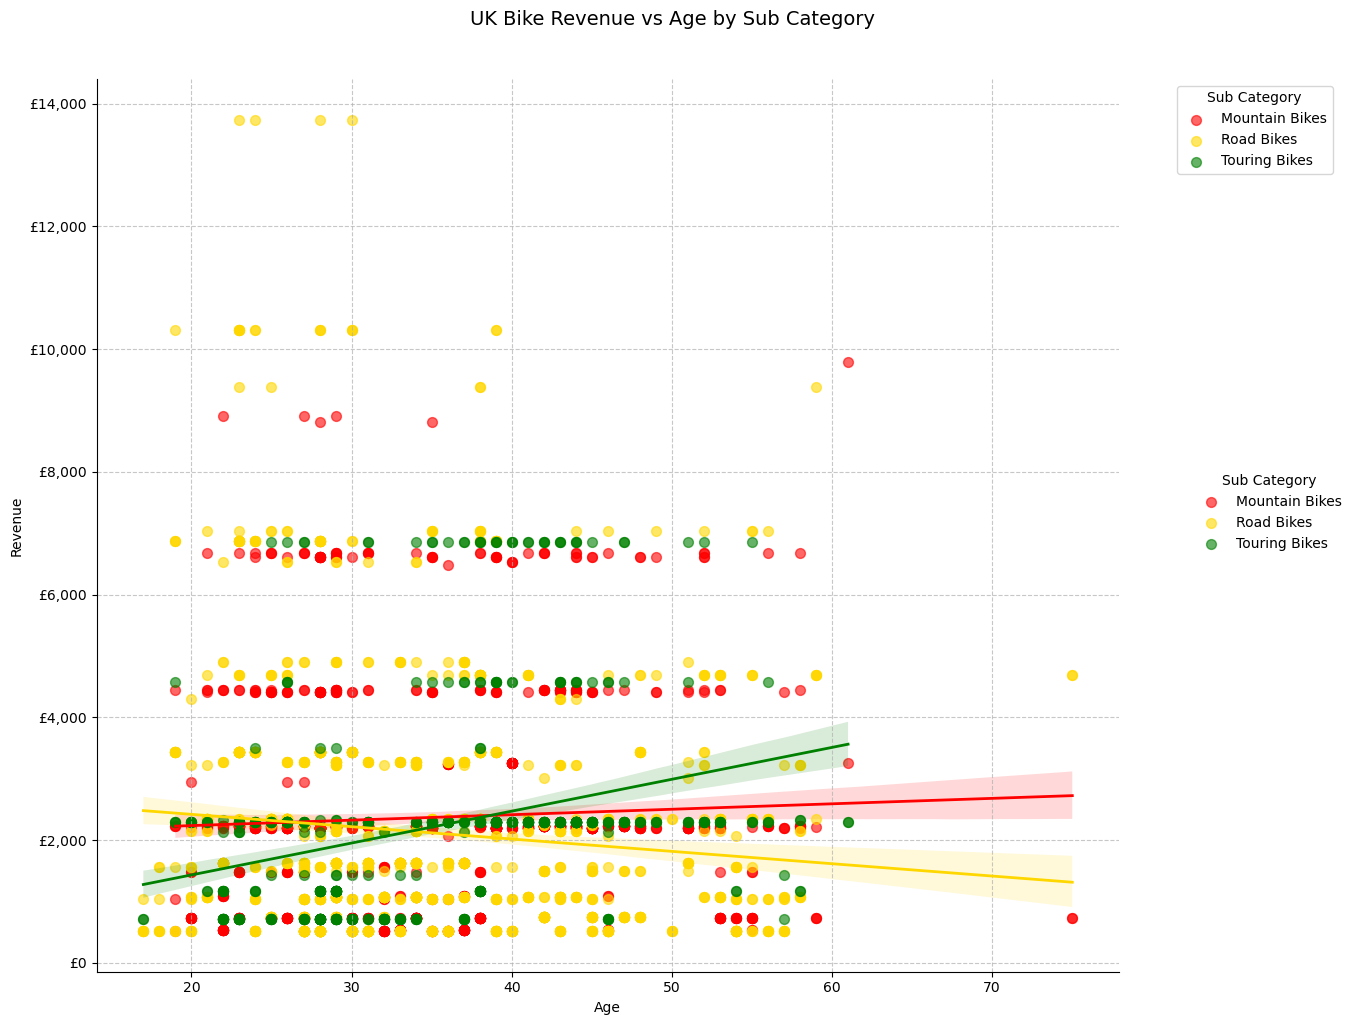

In [210]:

custom_palette = ['#FF0000', '#FFD700', '#008000'] 

uk_bk_a = sns.lmplot(data=bike_uk_filt, 
               x='Customer Age', 
               y='Revenue', 
               hue='Sub Category',
               height=10,  
               aspect=1.2,  
               palette=custom_palette, 
               scatter_kws={'alpha': 0.6, 's': 50},  
               line_kws={'linewidth': 2})  

uk_bk_a.fig.suptitle('UK Bike Revenue vs Age by Sub Category', fontsize=14, y=1.02)
uk_bk_a.set_axis_labels('Age', 'Revenue', fontsize=10)

uk_bk_a.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))

plt.legend(title='Sub Category', bbox_to_anchor=(1.05, 1), loc='upper left')

uk_bk_a.ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()
